In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.12.0


In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
class my_callbacks(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') < 0.4):
            print('\nLoss is low so cancelling training!')
            self.model.stop_training = True

In [7]:
callbacks = my_callbacks()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10)
])
model.compile(optimizer=keras.optimizers.Adam(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5062 - accuracy: 0.8234
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3788 - accuracy: 0.8626
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3388 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3115 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2940 - accuracy: 0.8921


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

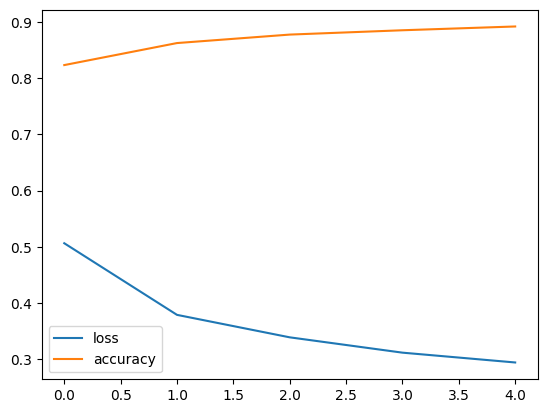

In [11]:
pd.DataFrame(model.history.history).plot()
plt.show()

In [12]:
test_loss, test_score = model.evaluate(test_images, test_labels)
print('the test score is ', test_score)

313/313 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.8699
the test score is  0.8698999881744385


In [13]:
len(train_images), len(train_labels), len(test_images), len(test_labels)

(60000, 60000, 10000, 10000)